In [1]:
# Importamos nuestras librerías

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

api_fred_key = '045e43758b3197ce074ee27ba90aebe9'
base_url = "https://api.stlouisfed.org/fred/series/observations"

# Top 10 
top_10_series = {
    'Consumer Price Index': 'CPIAUCSL',
    'Unemployment Rate': 'UNRATE',
    'Gross Domestic Product': 'GDP',
    'Federal Funds Rate': 'FEDFUNDS',
    'Industrial Production Index': 'INDPRO',
    'Public Debt': 'GFDEBTN',
    'M2 Money Stock': 'WM2NS',
    '10-Year Breakeven Inflation Rate': 'T10YIE',
    'Real Gross Domestic Product': 'GDPC1',
    'Producer Price Index': 'PPIACO'
}

def get_fred_data(series_id, start_date, end_date):
    params = {
        'series_id': series_id,
        'api_key': api_fred_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df.set_index('date')['value']



In [2]:
# Seteamos 10 años de datos.
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=3650)).strftime('%Y-%m-%d')

# Busca los datos para todas las series
data = {}
for name, series_id in top_10_series.items():
    data[name] = get_fred_data(series_id, start_date, end_date)

def plot_indicator(indicator_name, data, color_palette='coolwarm'):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    sns.set_palette(color_palette)
    
    ax = sns.lineplot(x=data.index, y=data.values, linewidth=2)
    
    plt.title(f'{indicator_name} (Últimos 10 años)', fontsize=16)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Valores', fontsize=12)
    
    plt.xticks(rotation=45)
    plt.tight_layout() # Ajustar la imagen
    
    # Área bajo la curva
    ax.fill_between(data.index, data.values, alpha=0.3)
    
    # Añada los puntos de datos
    sns.scatterplot(x=data.index, y=data.values, s=30, color=sns.color_palette(color_palette)[-1])
    
    plt.show()

1. Índice de Precios al Consumidor (CPI):
   - Mide el cambio promedio en los precios que los consumidores urbanos pagan por una canasta de bienes y servicios.
   - Un aumento constante en el CPI indica inflación, lo que significa que el poder adquisitivo del dinero está disminuyendo.
   - Una tasa de inflación moderada (alrededor del 2% anual) se considera generalmente saludable para la economía.
   - Una inflación alta puede llevar a la incertidumbre económica y erosionar el valor de los ahorros.
   - Una disminución en el CPI (deflación) puede ser problemática, ya que puede llevar a una espiral deflacionaria donde los consumidores posponen las compras, esperando precios más bajos.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


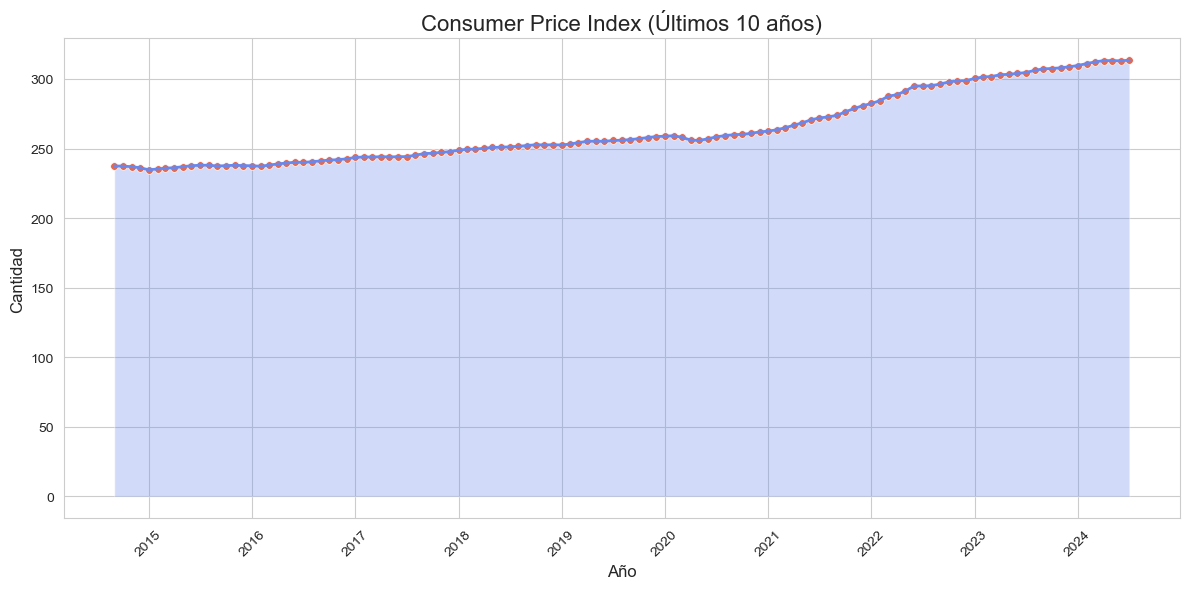

In [19]:
pd.option_context('mode.use_inf_as_na', True)
plot_indicator('CPI', data['Consumer Price Index'], color_palette='coolwarm')

2. Tasa de Desempleo:
   - Representa el porcentaje de la fuerza laboral que está sin trabajo pero buscando empleo activamente.
   - Una disminución en la tasa de desempleo generalmente indica una economía en crecimiento y un mercado laboral fuerte.
   - Sin embargo, una tasa de desempleo extremadamente baja puede llevar a presiones inflacionarias debido al aumento de los salarios.
   - Es importante considerar también otros factores como la tasa de participación laboral y el subempleo para tener una imagen completa del mercado laboral.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


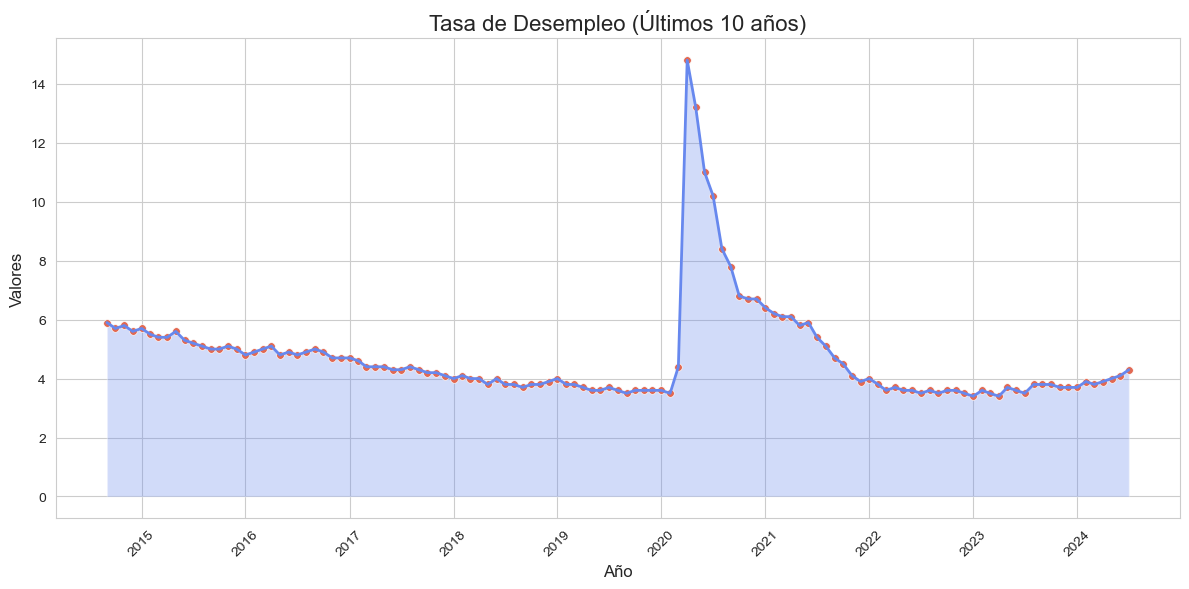

In [21]:
plot_indicator('Tasa de Desempleo', data['Unemployment Rate'], color_palette='coolwarm')

3. Producto Interno Bruto (GDP):
   - Es el valor total de todos los bienes y servicios producidos en un país en un período específico.
   - Una tendencia ascendente indica expansión económica, mientras que una tendencia descendente puede señalar una recesión.
   - El crecimiento del PIB se considera saludable cuando es sostenible a largo plazo, generalmente entre el 2% y el 3% anual para economías desarrolladas.
   - Un crecimiento demasiado rápido puede llevar a presiones inflacionarias, mientras que un crecimiento lento o negativo puede resultar en aumento del desempleo y disminución del nivel de vida.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


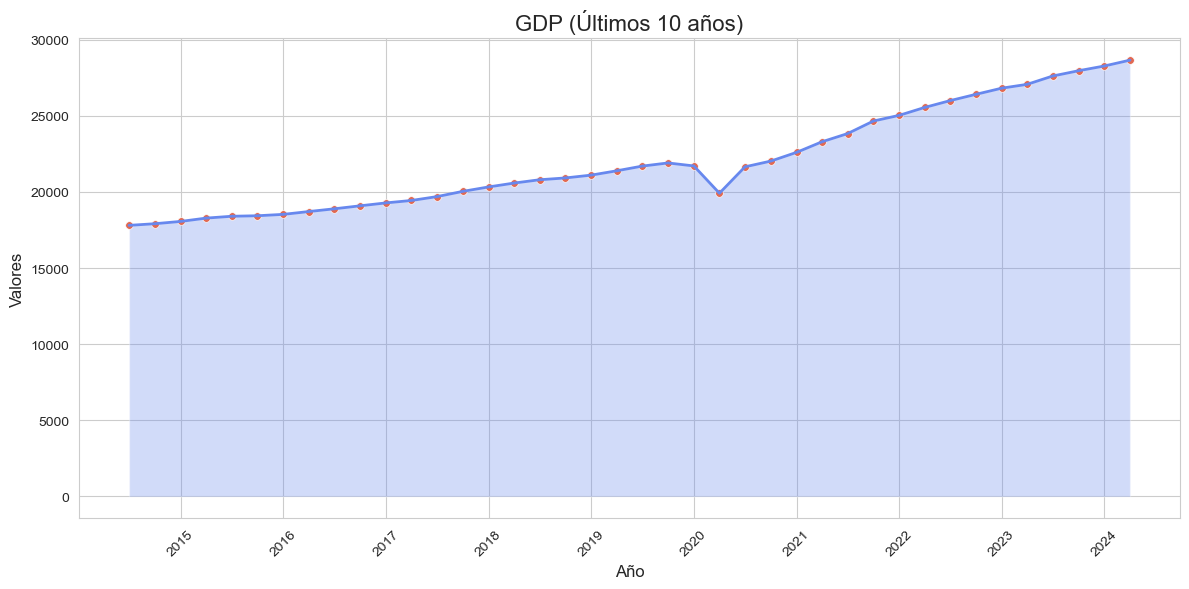

In [22]:
plot_indicator('GDP', data['Gross Domestic Product'], color_palette='coolwarm')

4. Tasa de Fondos Federales:
   - Es la tasa de interés a la que los bancos se prestan dinero entre sí durante la noche.
   - La Reserva Federal utiliza esta tasa como una herramienta principal de política monetaria.
   - Tasas bajas suelen estimular la economía al hacer que el crédito sea más accesible, fomentando el gasto y la inversión.
   - Tasas altas pueden frenar la inflación al hacer que el crédito sea más caro, lo que puede ralentizar el crecimiento económico.
   - Los cambios en esta tasa pueden afectar a otras tasas de interés en toda la economía, incluyendo hipotecas y préstamos comerciales.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


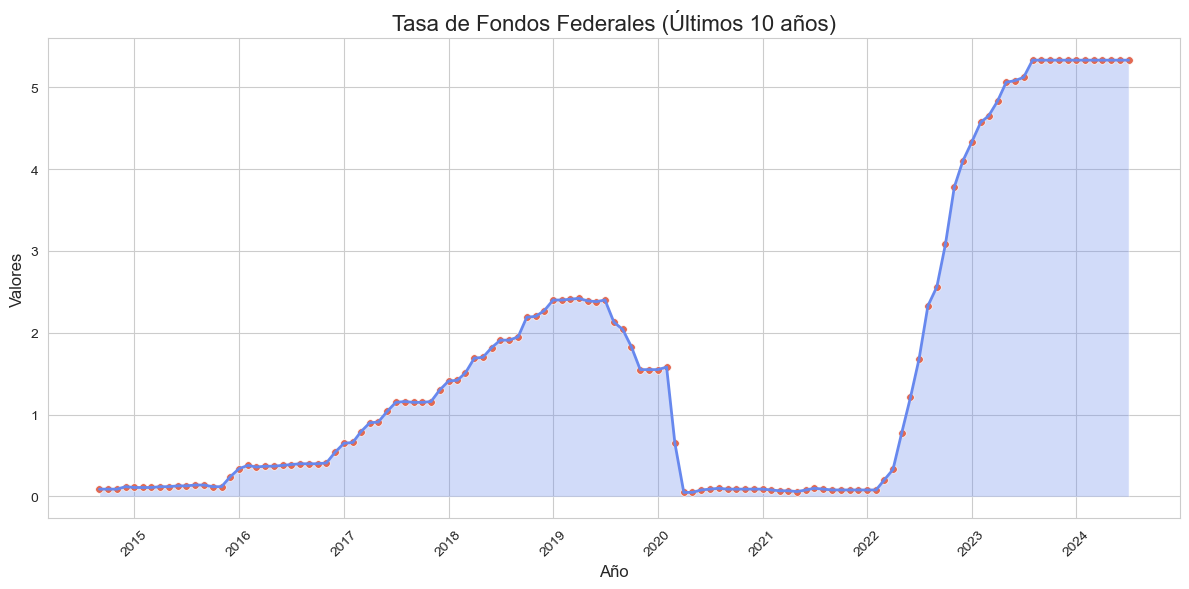

In [23]:
plot_indicator('Tasa de Fondos Federales', data['Federal Funds Rate'], color_palette='coolwarm')

5. Índice de Producción Industrial:
   - Mide el output del sector manufacturero, minero, eléctrico y de gas de una economía.
   - Un aumento en este índice sugiere expansión económica, particularmente en el sector manufacturero.
   - Es un indicador líder, lo que significa que a menudo cambia antes que la economía en general.
   - Puede proporcionar información sobre la demanda futura de bienes y el estado general de la economía.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


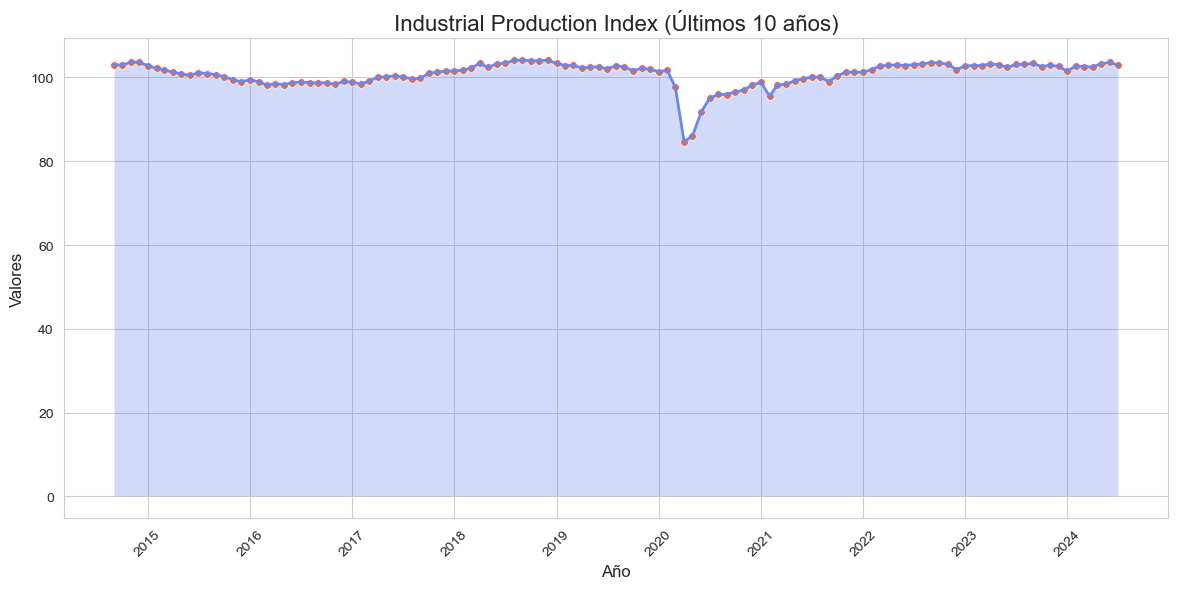

In [24]:
plot_indicator('Industrial Production Index', data['Industrial Production Index'], color_palette='coolwarm')

6. Deuda Pública:
   - Representa la cantidad total que un gobierno debe a sus acreedores.
   - Un aumento rápido podría indicar problemas fiscales a largo plazo, como dificultades para financiar programas gubernamentales o potenciales aumentos de impuestos.
   - Sin embargo, la deuda en sí misma no es necesariamente mala si se utiliza para inversiones que impulsan el crecimiento económico.
   - Es importante considerar la relación deuda/PIB, así como la capacidad del gobierno para servir la deuda.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


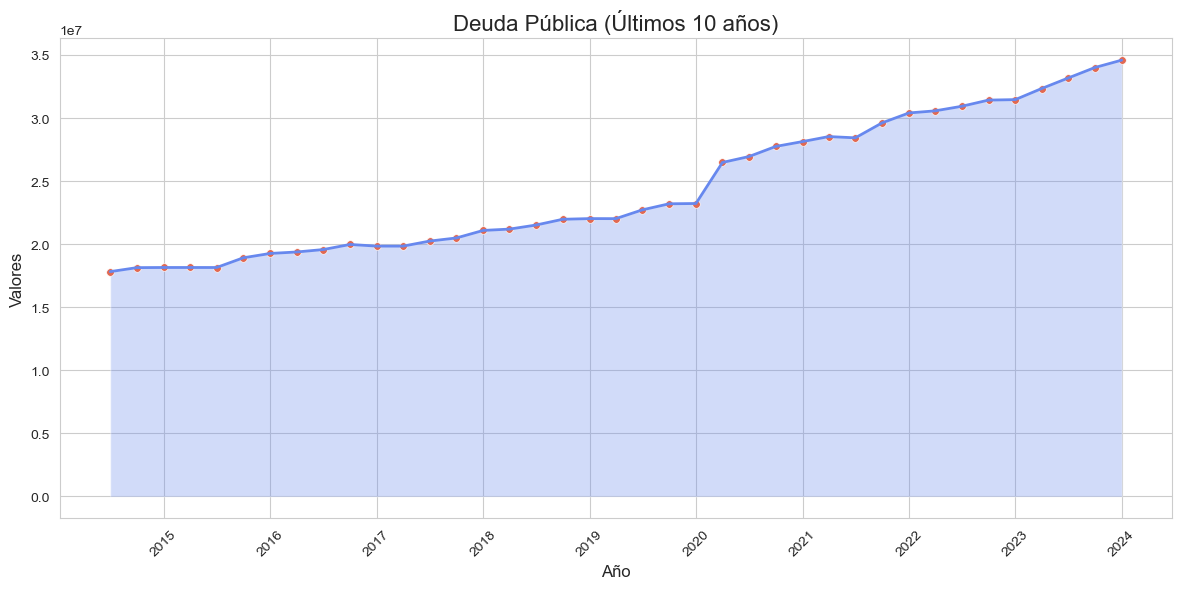

In [25]:
plot_indicator('Deuda Pública', data['Public Debt'], color_palette='coolwarm')

7. Oferta Monetaria M2:
   - Incluye efectivo, depósitos a la vista, y activos líquidos a corto plazo como cuentas de ahorro y fondos del mercado monetario.
   - Un aumento rápido en M2 podría indicar riesgos inflacionarios, ya que más dinero en circulación puede llevar a un aumento en los precios.
   - Sin embargo, la relación entre M2 y la inflación no es siempre directa, especialmente en períodos de baja velocidad del dinero.
   - Los bancos centrales monitorean M2 como parte de su estrategia de política monetaria.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


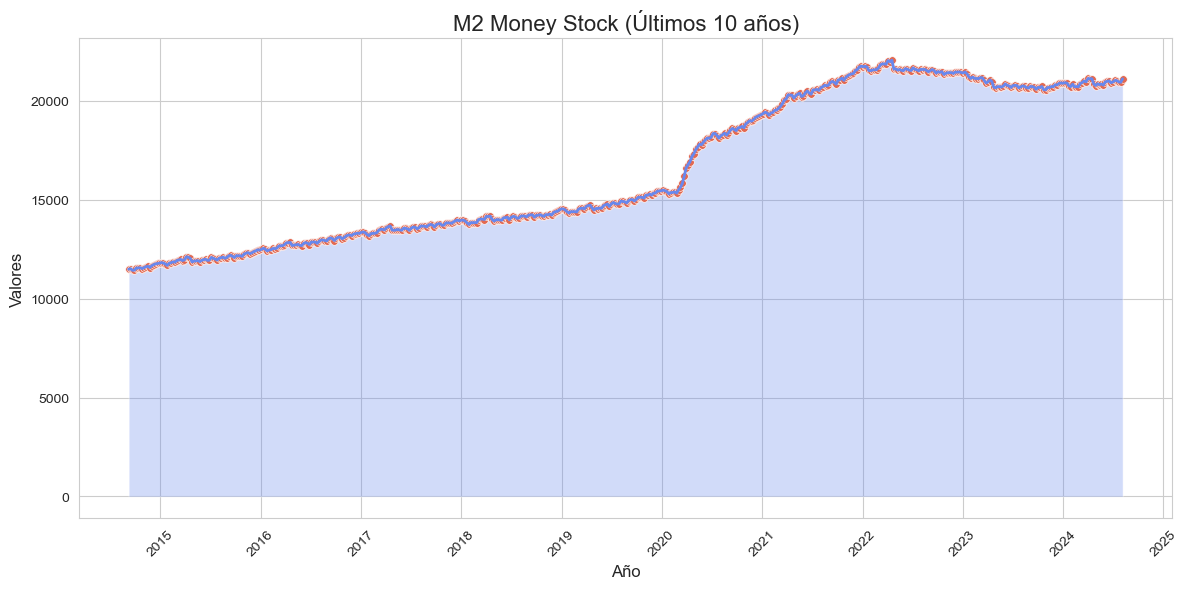

In [26]:
plot_indicator('M2 Money Stock', data['M2 Money Stock'], color_palette='coolwarm')

8. Tasa de Inflación de Equilibrio a 10 Años:
   - Es la diferencia entre el rendimiento de los bonos del Tesoro a 10 años y el de los Valores Protegidos contra la Inflación del Tesoro (TIPS) a 10 años.
   - Refleja las expectativas de inflación a largo plazo del mercado.
   - Es un indicador importante para los bancos centrales al formular la política monetaria.
   - Puede influir en las decisiones de inversión a largo plazo y en la fijación de precios de activos financieros.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


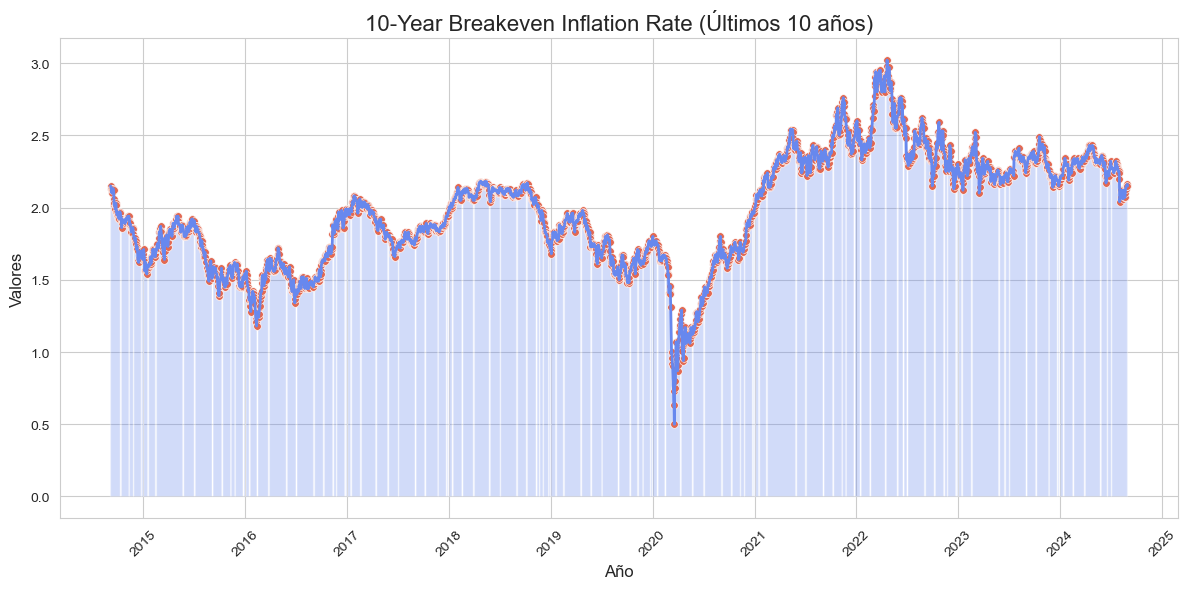

In [27]:
plot_indicator('10-Year Breakeven Inflation Rate', data['10-Year Breakeven Inflation Rate'], color_palette='coolwarm')

9. PIB Real:
   - Es el PIB ajustado por inflación, lo que proporciona una medida más precisa del crecimiento económico real.
   - Permite comparaciones significativas del crecimiento económico a lo largo del tiempo y entre países.
   - Un crecimiento constante del PIB real indica una expansión económica sostenible.
   - Es crucial para evaluar la salud general de la economía y la efectividad de las políticas económicas.



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


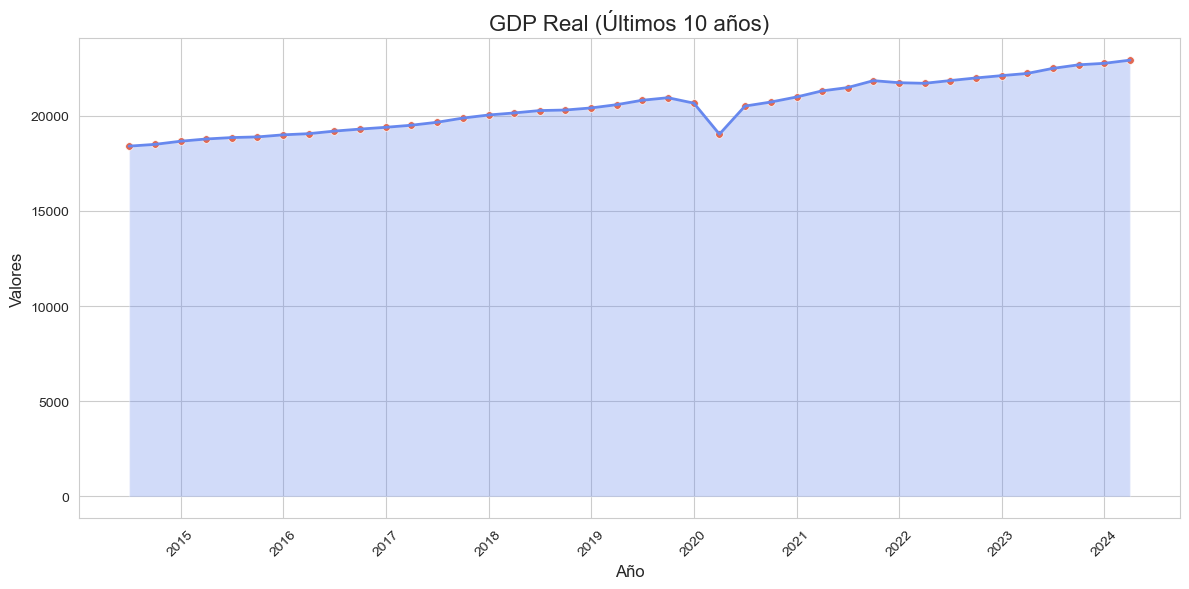

In [28]:
plot_indicator('GDP Real', data['Real Gross Domestic Product'], color_palette='coolwarm')

10. Índice de Precios al Productor:
    - Mide los precios promedio que reciben los productores domésticos por sus bienes y servicios.
    - Puede ser un indicador adelantado de la inflación al consumidor, ya que los aumentos de costos para los productores a menudo se trasladan a los consumidores.
    - Proporciona información sobre las presiones de costos en diferentes etapas de la producción.
    - Es útil para predecir cambios en el CPI y para entender las dinámicas de precios en diferentes sectores de la economía.


c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


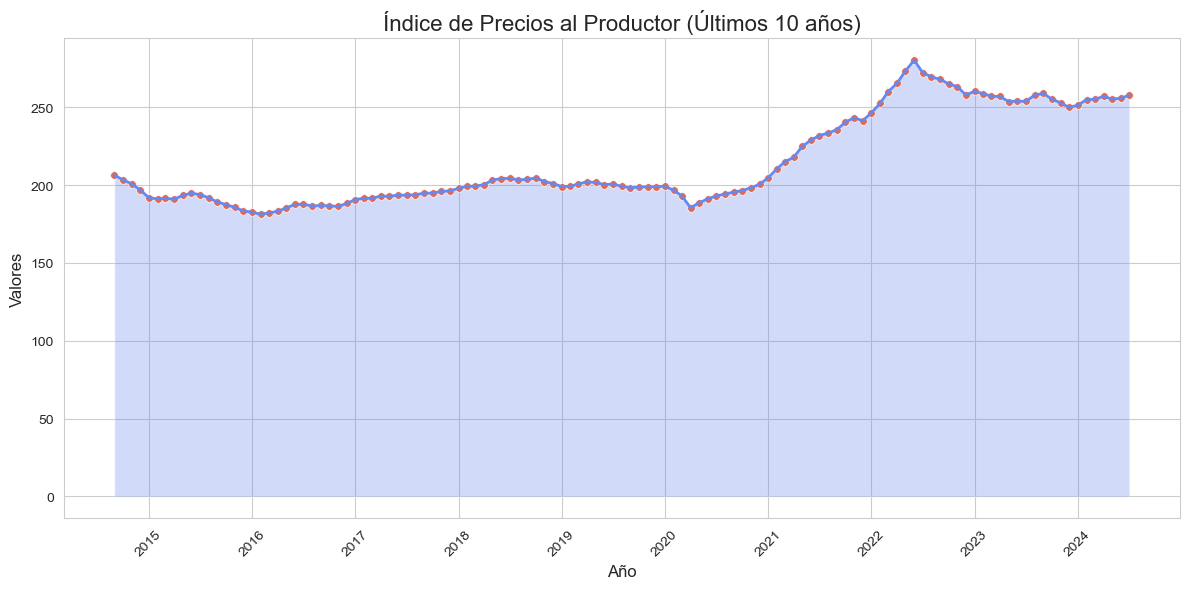

In [29]:
plot_indicator('Índice de Precios al Productor', data['Producer Price Index'], color_palette='coolwarm')

## Todo en uno

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

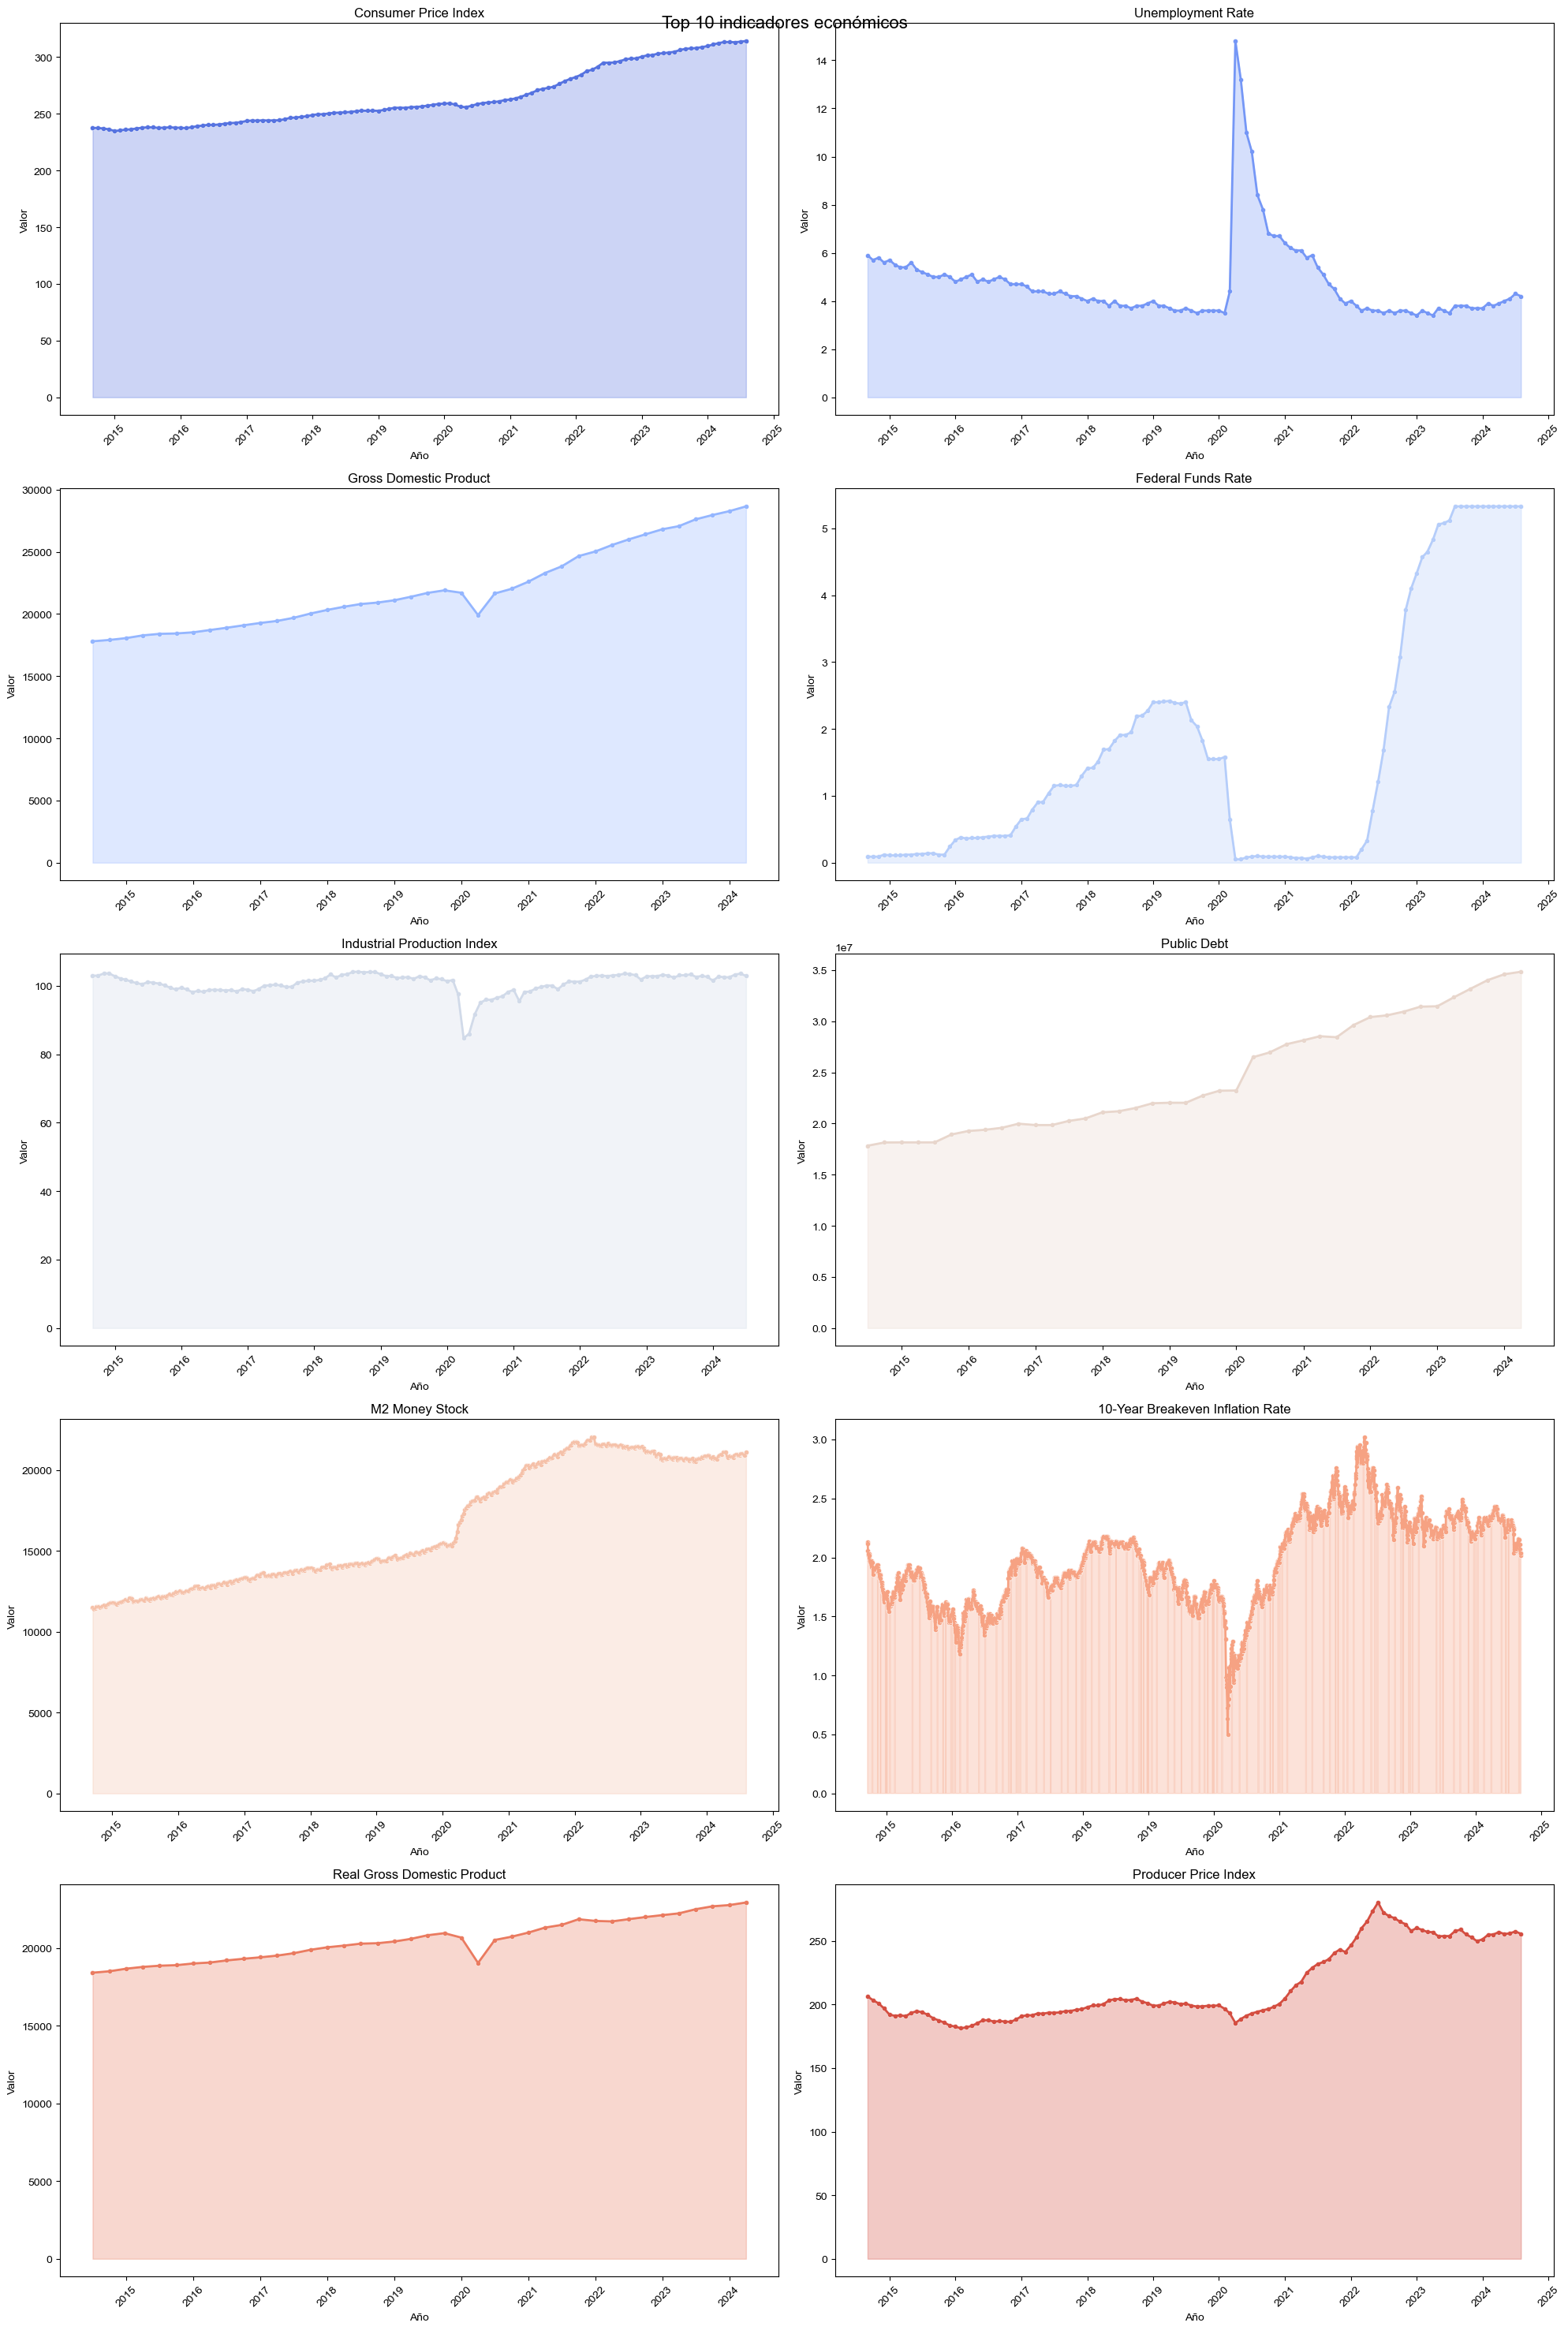

In [3]:
def plot_all_indicators(data, color_palette='coolwarm'):
    fig, axes = plt.subplots(5, 2, figsize=(20, 30))
    fig.suptitle('Top 10 indicadores económicos', fontsize=16)
    
    sns.set_style("whitegrid")
    colors = sns.color_palette(color_palette, n_colors=len(data))
    
    for (name, series), ax, color in zip(data.items(), axes.flatten(), colors):
        sns.lineplot(x=series.index, y=series.values, ax=ax, color=color, linewidth=2)
        
        ax.set_title(name, fontsize=12)
        ax.set_xlabel('Año', fontsize=10)
        ax.set_ylabel('Valor', fontsize=10)
        
        ax.tick_params(axis='x', rotation=45)
        
        # Añade un area bajo la curva
        ax.fill_between(series.index, series.values, alpha=0.3, color=color)
        
        # Marcar los puntos de datos:
        sns.scatterplot(x=series.index, y=series.values, ax=ax, s=20, color=color)
    
    plt.tight_layout()
    plt.show()

# Todo en una figura
plot_all_indicators(data)